# Table of Contents
- [Dynamic Time Patterns for Algorithmic Trading using machine learning](#dynamic-time-patterns-for-algorithmic-trading-using-machine-learning)
  - [Setup and Preprocessing](#setup-and-preprocessing)
  - [Math Behind the Algorithm](#math)
    - [Distance Metrics](#distance-metrics)  
    - [K Nearest Neighbor Algorithm](#k-nearest-neighbor-algorithm)
  - [Simple Backtest](#simple-backtest-of-forecast-predictions)
    - [Backtest Strategy](#backtest-strategy)
  - [Results and Visualization](#results-and-visualization)  
  - [Conclusion](#conclusion)

# Dynamic Time Patterns for Algorithmic Trading using machine learning
This notebook goes trough the dynamic time pattern algorithm and its implementation.


## Setup and Preprocessing
If you want to run algorithm for yourself, import libraries, and initialize data. The time-inverval and parameters i have chosen makes it take roughly 20 minutes. If you don't want to run it, just see math and implementation

### Enviornment Setup
Install the required libraries using:

In [9]:
pip install numpy pandas matplotlib fastdtw scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from sklearn.neighbors import NearestNeighbors

### Data Collection
For this project, high-frequency forex data has been used, soruced from Metatrader.
It is downloaded as 1 minute data, which is being changed to 5-minute intervals, where the Closing price of the asset will be used for the return.
In the case of the code below, the GBP/USD data is used, from the time period March 1, 2021 17:15 - march 31, 2021 17:15.

In [14]:
df = pd.read_csv("gbp_usd_5min.csv", parse_dates=["Time"])

# Sort the index to ensure monotonicity
df.set_index("Time", inplace=True)
df = df.sort_index()

# Define proper date range
start_date = "2021-03-01 17:15"
end_date = "2021-03-31 17:15"

# Filter the data
df = df.loc[start_date:end_date]

# Print the last few rows to verify
print(df.tail())


                        Open     High      Low    Close
Time                                                   
2021-03-31 16:55:00  1.37838  1.37848  1.37788  1.37791
2021-03-31 17:00:00  1.37792  1.37816  1.37759  1.37809
2021-03-31 17:05:00  1.37808  1.37840  1.37787  1.37787
2021-03-31 17:10:00  1.37802  1.37802  1.37794  1.37795
2021-03-31 17:15:00  1.37795  1.37801  1.37794  1.37798


### data preprocessing

First, one can check for missing values. in this case there are none.

In [11]:
print(df.isna().sum())


Open     0
High     0
Low      0
Close    0
dtype: int64


Logarithmic returns are computed based on closing price at time t divided by closing price at time t+1.

In [15]:
df["returns"] = np.log(df["Close"] / df["Close"].shift(1))
df.dropna(inplace=True)

The returns are smoothed using exponential moving average.
The Exponential Moving Average (EMA) is a weighted moving average that gives more significance to recent data points, making it more responsive to price changes compared to a simple moving average (SMA). 

#### Formula:
$
EMA_t = \alpha \cdot R_t + (1 - \alpha) \cdot EMA_{t-1}
$

where:
- $ EMA_t $ is the exponential moving average at time $ t $,
- $ R_t $ is the return at time \( t \),
- $ \alpha $ is the smoothing factor, calculated as:
  $
  \alpha = \frac{2}{span + 1}
  $
- $ span $ is the chosen period for smoothing.

#### Explanation:
- The smoothing factor $ \alpha $ determines how much weight recent returns receive. A higher \( \alpha \) (lower span) makes the EMA react more to new data, while a lower \( \alpha \) (higher span) results in a smoother curve.

The implementation in python is as followed:

In [20]:
def apply_ema(series, span):
    return series.ewm(span=span, adjust=False).mean()
df["ema_returns"] = apply_ema(df["returns"], span=15)
df.dropna(inplace=True)

To show manual EMA calculations, the manual caclulation of ema return of day 100 will be done, comparing it do the functions output.

In [ ]:
span = 15
EMA_return_100 = 2/(span+1) * df["returns"].iloc[100] + (1 - 2/(span+1)) * df["ema_returns"].iloc[99]
if EMA_return_100 == df.iloc[100]["ema_returns"]:
    print("🎉🎉🎉")
print("Manual EMA:", EMA_return_100)
print("apply_ema() EMA:", df["ema_returns"].iloc[100])

🎉🎉🎉
Manual EMA: 4.034298064564988e-05
apply_ema() EMA: 4.034298064564988e-05


In [ ]:
window_size = 120
df["rolling_std"] = df["ema_returns"].rolling(window=window_size, min_periods=1).std()
df["rolling_std"] = df["rolling_std"].fillna(df["rolling_std"].mean())
df["ema_returns_std"] = df["ema_returns"] / df["rolling_std"]
df.dropna(inplace=True)

## Math

### Distance Metrics
The kNN model compares time series embeddings using:
- **Euclidean**: $ \sqrt{\sum (x_i - y_i)^2} $
- **DTW**: Dynamic Time Warping, aligns series for pattern matching.
- **ASD**: Average Squared Difference, $\text{ASD}(x, y) = \frac{1}{n} \sum (x_i - y_i)^2 $
- **CID**: Complexity-Invariant Distance, scales Euclidean by complexity ratio.


### K-Nearest-Neighbor Algorithm

### Preprocessing
We transform raw prices into a forecastable series:
1. Log returns: $r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$
2. EMA of returns: $EMA_t = \alpha \cdot r_t + (1 - \alpha) \cdot EMA_{t-1}$ (span=15)
3. Rolling volatility: $\sigma_t = \text{std}(EMA_{t-window:t})$ (window=120)
4. Standardized returns: $z_t = \frac{EMA_t}{\sigma_t}$

## Simple Backtest of Forecast Predictions

### Backtest Strategy

## Results and Visualization

## Conclusion

In [4]:
df = pd.read_csv("data/forex_data/usd_dkk_5min.csv", parse_dates=["Time"])

# Sort the index to ensure monotonicity
df.reset_index(drop=True, inplace=True)
df.set_index("Time", inplace=True)
df = df.sort_index()

# Define the start and end dates in the proper datetime format
start_date = "2024-01-01 17:15"
end_date = "2024-2-01 17:15"

# Filter the data to the defined date range
df = df[start_date:end_date].copy()

# Print the last few rows to verify
print(df.tail())


                        Open     High      Low    Close
Time                                                   
2024-02-01 16:55:00  6.85628  6.85635  6.85520  6.85618
2024-02-01 17:00:00  6.85615  6.85615  6.85407  6.85416
2024-02-01 17:05:00  6.85450  6.85450  6.85416  6.85438
2024-02-01 17:10:00  6.85438  6.85497  6.85424  6.85460
2024-02-01 17:15:00  6.85461  6.85798  6.85435  6.85584


In [49]:
# Calculate log returns
df["returns"] = np.log(df["Close"] / df["Close"].shift(1))
df.dropna(inplace=True)

In [50]:
from tslearn.metrics import dtw
from sklearn.neighbors import NearestNeighbors
import numpy as np
from fastdtw import fastdtw


def knn_dtw_forecast(series, window_size=800, embed_size=10, k=10):
    predictions = []
    
    # FastDTW metric for kNN
    def dtw_metric(x, y):
        x_norm = (x - x.mean()) / x.std()
        y_norm = (y - y.mean()) / y.std()
        return fastdtw(x_norm, y_norm)[0]  # Returns only distance

    # Main loop
    for i in range(window_size + embed_size, len(series)):
        query = series.iloc[i - embed_size:i].values
        history = series.iloc[:i - embed_size].values

        if len(history) < window_size:
            predictions.append(0)
            continue

        # Create rolling window of historical embeddings
        start_index = max(0, len(history) - window_size)
        historical_embeddings = np.array([history[j:j + embed_size] for j in range(start_index, len(history) - embed_size + 1)])

        if query.std() == 0 or np.any(historical_embeddings.std(axis=1) == 0):
            predictions.append(0)
            continue

        # Parallelized kNN search
        nbrs = NearestNeighbors(n_neighbors=k, metric=dtw_metric, n_jobs=-1).fit(historical_embeddings)
        dist, indices = nbrs.kneighbors([query])

        # Predict next return using weighted average
        next_returns = [series.iloc[start_index + idx + embed_size] for idx in indices[0]]
        weights = 1 / (dist[0] + 1e-6)  # Avoid div by zero
        prediction = np.average(next_returns, weights=weights)

        predictions.append(prediction)
        
    # Padding at the start
    return [0] * (window_size + embed_size) + predictions

# Run optimized forecast
df["dtw_pred"] = knn_dtw_forecast(df["returns"])


In [51]:
df.to_csv("output2.csv")
print(df["returns"])
print(df["dtw_pred"])

Time
2024-01-01 17:20:00    0.000080
2024-01-01 17:25:00    0.000064
2024-01-01 17:30:00   -0.000039
2024-01-01 17:35:00    0.000164
2024-01-01 17:40:00   -0.000022
                         ...   
2024-02-01 16:55:00   -0.000038
2024-02-01 17:00:00   -0.000295
2024-02-01 17:05:00    0.000032
2024-02-01 17:10:00    0.000032
2024-02-01 17:15:00    0.000181
Name: returns, Length: 6573, dtype: float64
Time
2024-01-01 17:20:00    0.000000
2024-01-01 17:25:00    0.000000
2024-01-01 17:30:00    0.000000
2024-01-01 17:35:00    0.000000
2024-01-01 17:40:00    0.000000
                         ...   
2024-02-01 16:55:00   -0.000062
2024-02-01 17:00:00   -0.000009
2024-02-01 17:05:00   -0.000031
2024-02-01 17:10:00   -0.000059
2024-02-01 17:15:00    0.000023
Name: dtw_pred, Length: 6573, dtype: float64


In [52]:
def strategy(df,  buy_threshold=0.0001, sell_threshold=-0.0001):
    df["position"] = 0  # 1 for long, -1 for short, 0 for neutral

    for i in range(810, len(df) - 1):

        # Determine position based on prediction
        if df['dtw_pred'].iloc[i] > buy_threshold:
            df.loc[df.index[i], 'position'] = 1

        elif df['dtw_pred'].iloc[i] < sell_threshold:
            df.loc[df.index[i], 'position'] = -1
        else:
            df.loc[df.index[i], 'position'] = 0


    return df
strategy(df)

,Open,High,Low,Close,returns,dtw_pred,position
Time,,,,,,,
2024-01-01 17:20:00,6.74681,6.74790,6.74681,6.74740,0.000080,0.000000,0
2024-01-01 17:25:00,6.74735,6.74791,6.74735,6.74783,0.000064,0.000000,0
2024-01-01 17:30:00,6.74753,6.74792,6.74751,6.74757,-0.000039,0.000000,0
2024-01-01 17:35:00,6.74757,6.74868,6.74743,6.74868,0.000164,0.000000,0
2024-01-01 17:40:00,6.74868,6.74904,6.74838,6.74853,-0.000022,0.000000,0
...,...,...,...,...,...,...,...
2024-02-01 16:55:00,6.85628,6.85635,6.85520,6.85618,-0.000038,-0.000062,0
2024-02-01 17:00:00,6.85615,6.85615,6.85407,6.85416,-0.000295,-0.000009,0
2024-02-01 17:05:00,6.85450,6.85450,6.85416,6.85438,0.000032,-0.000031,0


In [53]:
print(df["position"])

Time
2024-01-01 17:20:00    0
2024-01-01 17:25:00    0
2024-01-01 17:30:00    0
2024-01-01 17:35:00    0
2024-01-01 17:40:00    0
                      ..
2024-02-01 16:55:00    0
2024-02-01 17:00:00    0
2024-02-01 17:05:00    0
2024-02-01 17:10:00    0
2024-02-01 17:15:00    0
Name: position, Length: 6573, dtype: int64


In [54]:
print(df.tail(10))

                        Open     High      Low    Close   returns  \
Time                                                                
2024-02-01 16:30:00  6.85666  6.85691  6.85605  6.85658 -0.000034   
2024-02-01 16:35:00  6.85657  6.85657  6.85538  6.85631 -0.000039   
2024-02-01 16:40:00  6.85630  6.85740  6.85614  6.85683  0.000076   
2024-02-01 16:45:00  6.85671  6.85719  6.85618  6.85621 -0.000090   
2024-02-01 16:50:00  6.85633  6.85661  6.85608  6.85644  0.000034   
2024-02-01 16:55:00  6.85628  6.85635  6.85520  6.85618 -0.000038   
2024-02-01 17:00:00  6.85615  6.85615  6.85407  6.85416 -0.000295   
2024-02-01 17:05:00  6.85450  6.85450  6.85416  6.85438  0.000032   
2024-02-01 17:10:00  6.85438  6.85497  6.85424  6.85460  0.000032   
2024-02-01 17:15:00  6.85461  6.85798  6.85435  6.85584  0.000181   

                         dtw_pred  position  
Time                                         
2024-02-01 16:30:00  1.032757e-05         0  
2024-02-01 16:35:00 -2.589091e-05

In [55]:
import numpy as np

def backtest(df, starting_balance, trade_risk):
    df["balance"] = np.nan
    df.iloc[0, df.columns.get_loc("balance")] = starting_balance  # Start at first row
    df["trade_status"] = 0
    df["trade_size"] = np.nan
    df["trade_pnl"] = np.nan
    df["trade_success"] = np.nan

    long_trades = 0
    short_trades = 0

    for i in range(1, len(df)-1):  # Start from 1 since we need previous balance
        df.iloc[i, df.columns.get_loc("balance")] = df.iloc[i-1, df.columns.get_loc("balance")]
        
        if df['position'].iloc[i] == 1:
            df.iloc[i, df.columns.get_loc("trade_status")] = 1
            entry_price = df['Close'].iloc[i]
            exit_price = df['Close'].iloc[i+1]
            trade_size = df["balance"].iloc[i-1] * trade_risk
            df.iloc[i, df.columns.get_loc("trade_size")] = trade_size
            pnl = trade_size * (exit_price - entry_price) / entry_price
            df.iloc[i, df.columns.get_loc("trade_pnl")] = pnl
            long_trades += 1
            
            df.iloc[i, df.columns.get_loc("trade_success")] = 1 if pnl > 0 else 0
            df.iloc[i, df.columns.get_loc("balance")] += pnl

        elif df['position'].iloc[i] == -1:
            df.iloc[i, df.columns.get_loc("trade_status")] = -1
            entry_price = df['Close'].iloc[i]
            exit_price = df['Close'].iloc[i+1]
            trade_size = df["balance"].iloc[i-1] * trade_risk
            df.iloc[i, df.columns.get_loc("trade_size")] = trade_size
            pnl = trade_size * (entry_price - exit_price) / entry_price
            df.iloc[i, df.columns.get_loc("trade_pnl")] = pnl
            short_trades += 1
            
            df.iloc[i, df.columns.get_loc("trade_success")] = 1 if pnl > 0 else 0
            df.iloc[i, df.columns.get_loc("balance")] += pnl

    total_trades = long_trades + short_trades
    return df, long_trades, short_trades, total_trades

# Assuming your dataframe is called 'df'
result_df, longs, shorts, total = backtest(df, 100000, 0.02)

In [56]:
print(df.tail(10))


                        Open     High      Low    Close   returns  \
Time                                                                
2024-02-01 16:30:00  6.85666  6.85691  6.85605  6.85658 -0.000034   
2024-02-01 16:35:00  6.85657  6.85657  6.85538  6.85631 -0.000039   
2024-02-01 16:40:00  6.85630  6.85740  6.85614  6.85683  0.000076   
2024-02-01 16:45:00  6.85671  6.85719  6.85618  6.85621 -0.000090   
2024-02-01 16:50:00  6.85633  6.85661  6.85608  6.85644  0.000034   
2024-02-01 16:55:00  6.85628  6.85635  6.85520  6.85618 -0.000038   
2024-02-01 17:00:00  6.85615  6.85615  6.85407  6.85416 -0.000295   
2024-02-01 17:05:00  6.85450  6.85450  6.85416  6.85438  0.000032   
2024-02-01 17:10:00  6.85438  6.85497  6.85424  6.85460  0.000032   
2024-02-01 17:15:00  6.85461  6.85798  6.85435  6.85584  0.000181   

                         dtw_pred  position       balance  trade_status  \
Time                                                                      
2024-02-01 16:30:00  

In [58]:
# Assume backtest has already run
df, long_trades, short_trades, total_trades = backtest(df, 100000, 3)


# Handle NaN explicitly
df['trade_returns'] = df['trade_pnl'] / df['balance'].shift(1)
df['trade_returns'] = df['trade_returns'].where(df['trade_pnl'].notna(), np.nan)
mean_return = df['trade_returns'].dropna().mean()
std_return = df['trade_returns'].dropna().std()
sharpe_ratio = mean_return / std_return * np.sqrt(252)

# Max Drawdown Calculation
df['peak'] = df['balance'].cummax()
df['drawdown'] = (df['balance'] - df['peak']) / df['peak']
max_drawdown = df['drawdown'].min()

# NMAE Calculation
y_true = df["returns"]
y_pred = df["dtw_pred"]
nmae = np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_true))

# Total Return
total_return = (df['balance'].iloc[-2] / df['balance'].iloc[0]) - 1

print(df['balance'].iloc[-2])
print((df['balance'].iloc[0]))
# Display Statistics
print(f"Sharpe Ratio (Annualized): {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Long Trades: {long_trades}")
print(f"Short Trades: {short_trades}")
print(f"Win Rate: {(df['trade_success'].sum() / total_trades * 100):.2f}%")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"NMAE: {nmae:.6f}")


100062.49072349374
100000.0
Sharpe Ratio (Annualized): 0.0193
Max Drawdown: -5.75%
Total Trades: 996
Long Trades: 562
Short Trades: 434
Win Rate: 48.49%
Total Return: 0.06%
NMAE: 1.073839


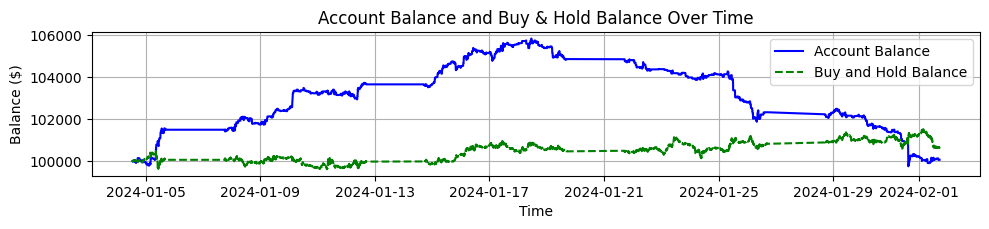

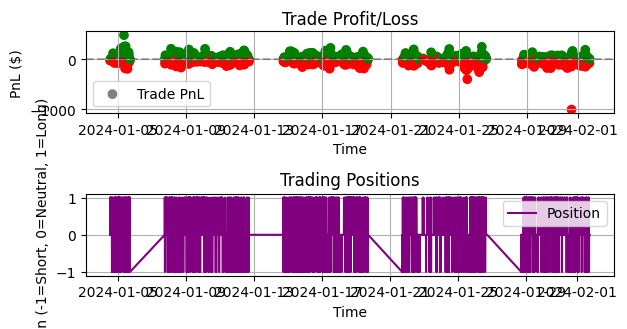

In [59]:
initial_price = df.iloc[810]['Close']
df['buy_and_hold'] = (df['Close'] / initial_price) * df['balance'].iloc[0]

# Plotting
plt.figure(figsize=(10, 6))

# 1. Balance Over Time
plt.subplot(3, 1, 1)
plt.plot(df.index[810:], df.iloc[810:]['balance'], label='Account Balance', color='blue')
plt.plot(df.index[810:], df.iloc[810:]['buy_and_hold'], label='Buy and Hold Balance', color='green', linestyle='--')
plt.title('Account Balance and Buy & Hold Balance Over Time')
plt.xlabel('Time')
plt.ylabel('Balance ($)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 2. Trade PnL
plt.subplot(3, 1, 2)
plt.scatter(df.index, df['trade_pnl'], 
           c=df['trade_success'].map({1: 'green', 0: 'red', np.nan: 'gray'}), 
           label='Trade PnL')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Trade Profit/Loss')
plt.xlabel('Time')
plt.ylabel('PnL ($)')
plt.grid(True)
plt.legend()

# 3. Positions
plt.subplot(3, 1, 3)
plt.plot(df.index[810:], df.iloc[810:]['position'], label='Position', color='purple')
plt.title('Trading Positions')
plt.xlabel('Time')
plt.ylabel('Position (-1=Short, 0=Neutral, 1=Long)')
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()